In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [3]:
X, y = mnist["data"], mnist["target"]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (70000, 784)
y shape:  (70000,)


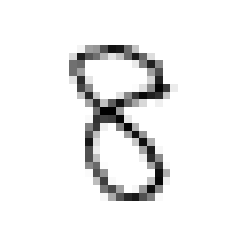

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[3600]
some_digit_image = some_digit.reshape(28, 28)

def plot_digit(some_digit_image):
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
              interpolation="nearest")
    plt.axis("off")

plot_digit(some_digit_image)
plt.show()

In [5]:
y[3600]

'8'

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
y_train_8 = (y_train == '8') # Select all 8s
y_test_8 = (y_test == '8')

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_8, cv = 3, scoring = "accuracy")

array([0.93185, 0.8829 , 0.8716 ])

In [11]:
from sklearn.base import BaseEstimator

class Never8Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
        
never_8_clf = Never8Classifier()
cross_val_score(never_8_clf, X_train, y_train_8, cv = 3, scoring = "accuracy")

array([0.9018 , 0.9007 , 0.90495])

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_pred)

array([[49639,  4510],
       [ 1763,  4088]])

In [14]:
perfect_predict_8 = y_train_8
confusion_matrix(y_train_8, perfect_predict_8)

array([[54149,     0],
       [    0,  5851]])

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8, y_train_pred)

0.4754594091649221

In [16]:
recall_score(y_train_8, y_train_pred)

0.6986839856434798

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred)

0.5658523081182089

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2290.27855161])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [20]:
threshold = -20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv = 3,
                            method = "decision_function")

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

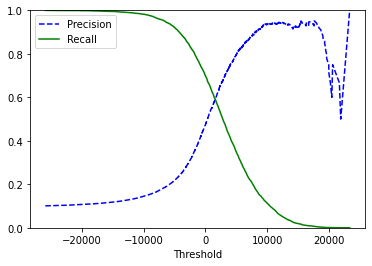

In [23]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

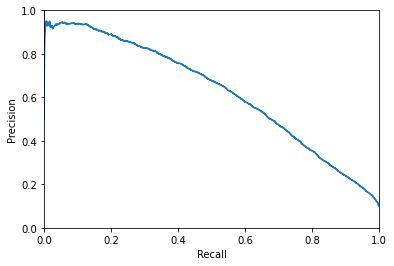

In [24]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0,1])
    plt.xlim([0,1])
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

Assuming I want to go for 90% precision, looking at the table we see we get a recall of ~20% and a threshold of 5000. Next, setting the threshold:

In [25]:
y_train_pred_90 = (y_scores > 5000)

In [26]:
precision_score(y_train_8, y_train_pred_90)

0.7977308294209703

In [27]:
recall_score(y_train_8, y_train_pred_90)

0.34848743804477866

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

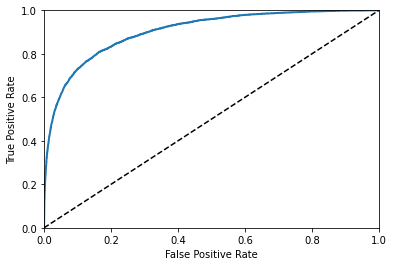

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_8, y_scores)

0.9033422906320833

Moving to random forest classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv=3,
                                    method = "predict_proba")

In [32]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8, y_scores_forest)

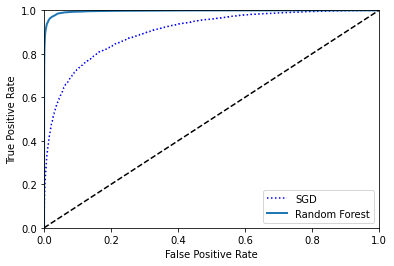

In [33]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [34]:
roc_auc_score(y_train_8, y_scores_forest)

0.9967264329379943

Multiclass classification

In [35]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['8'], dtype='<U1')

In [36]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-22989.52766048, -27282.58372533,  -3312.07621645,
          -113.08411327,  -8254.40237341,  -3760.7206834 ,
        -11631.19319117, -18515.22851593,    103.14221939,
         -8657.06630458]])

In [37]:
np.argmax(some_digit_scores)

8

In [38]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [39]:
sgd_clf.classes_[8]

'8'

In [40]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
print(ovo_clf.predict([some_digit]))
print(len(ovo_clf.estimators_))

['8']
45


In [41]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array(['8'], dtype=object)

In [42]:
forest_clf.predict_proba([some_digit])

array([[0.01, 0.  , 0.03, 0.06, 0.  , 0.02, 0.02, 0.  , 0.84, 0.02]])

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8635, 0.8816, 0.8741])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.89425, 0.9068 , 0.8992 ])

# Error analysis
Understaning confusion matrixs for many classes

In [45]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5593,    0,   13,    6,    9,   40,   32,    4,  225,    1],
       [   1, 6412,   46,   18,    3,   42,    5,    9,  196,   10],
       [  27,   28, 5259,   80,   71,   24,   71,   34,  353,   11],
       [  26,   18,  118, 5212,    1,  207,   28,   47,  411,   63],
       [  15,   14,   44,   10, 5222,    8,   34,   21,  309,  165],
       [  29,   19,   34,  145,   53, 4477,   76,   21,  499,   68],
       [  30,   17,   43,    2,   40,   91, 5546,    7,  141,    1],
       [  18,   12,   47,   21,   48,   13,    4, 5725,  179,  198],
       [  18,   63,   40,   93,    0,  125,   32,    7, 5430,   43],
       [  23,   19,   29,   55,  119,   30,    1,  175,  369, 5129]])

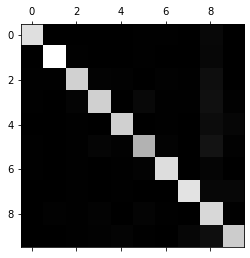

In [46]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

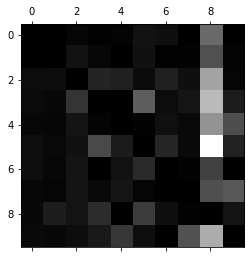

In [48]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [49]:
def plot_digits(images, images_per_row):
    for i in range(len(images)):
        plt.subplot(images_per_row, len(images) // images_per_row, i+1)
        plt.imshow(images[i].reshape(28,28), cmap = matplotlib.cm.binary, 
          interpolation="nearest")
        plt.axis("off")
        

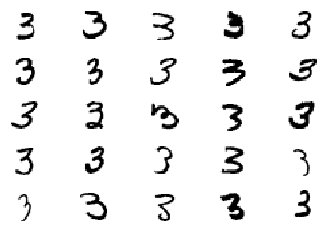

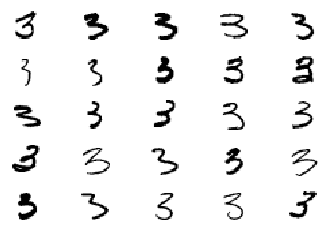

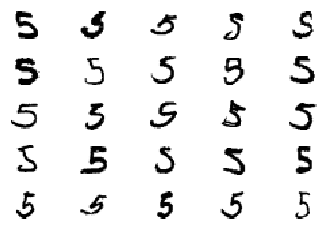

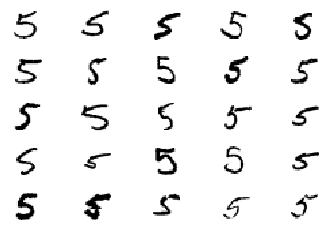

In [50]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plot_digits(X_aa[:25], images_per_row=5)
plt.show()
plot_digits(X_ab[:25], images_per_row=5)
plt.show()
plot_digits(X_ba[:25], images_per_row=5)
plt.show()
plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# Multilabel Classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [53]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
knn_clf.predict([some_digit])

array([[ True, False]])

In [57]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.96751229900394

# Removing noise
First, let's add some noise to the pictures, to later find a good method to remove the noise.

In [62]:
train_noise = np.random.randint(0, 100, (len(X_train), 784))
test_noise = np.random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + train_noise
X_test_mod = X_test + test_noise
y_train_mod = X_train
y_test_mod = X_test

In [65]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[100]])

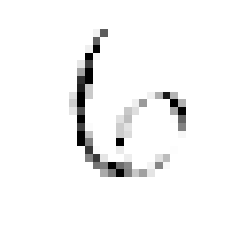

In [70]:
plot_digit(clean_digit.reshape(28,28))
plt.show()